In [120]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [ ]:
graph_out_dir='Data/Covid Cases/Covid Cases with FIPS/'
if not os.path.exists(covid_out_dir):
    os.makedirs(covid_out_dir)

In [6]:
temps2020 = pd.read_csv('Data/Descriptives/weather2020.csv')
avgtemps2020 = pd.DataFrame(temps2020.groupby(['DATE', 'COUNTY'])['DATA_VALUE'].mean())
avgtemps2020 = avgtemps2020.reset_index()  
avgtemps2020['DATE'] = pd.to_datetime(avgtemps2020['DATE'])

In [7]:
temps2021 = pd.read_csv('Data/Descriptives/weather2021.csv')
avgtemps2021 = pd.DataFrame(temps2021.groupby(['DATE', 'COUNTY'])['DATA_VALUE'].mean())
avgtemps2021 = avgtemps2021.reset_index()  
avgtemps2021['DATE'] = pd.to_datetime(avgtemps2021['DATE'])

In [8]:
temps2022 = pd.read_csv('Data/Descriptives/weather2022.csv')
avgtemps2022 = pd.DataFrame(temps2022.groupby(['DATE', 'COUNTY'])['DATA_VALUE'].mean())
avgtemps2022 = avgtemps2022.reset_index()  
avgtemps2022['DATE'] = pd.to_datetime(avgtemps2022['DATE'])

In [9]:
cases = pd.read_csv('Data/Covid Cases/Covid Cases with FIPS/Covid_Cases_Reduced_with_FIPS.csv')
cases['Date']=pd.to_datetime(cases['Date'], format='%Y-%m-%d')
cases['YEAR'] = pd.DatetimeIndex(cases['Date']).year

In [10]:
cases2020 = cases.loc[(cases['YEAR']==2020)].reset_index(drop=True)
cases2021 = cases.loc[(cases['YEAR']==2021)].reset_index(drop=True)
cases2022 = cases.loc[(cases['YEAR']==2022)].reset_index(drop=True)

In [29]:
def get_cases(county, date):
    val = cases.loc[(cases['County']== county) & (cases['Date']== date)]['Cases'].values
    if len(val)>0:
        return float(val)
    else:
        return 50.0

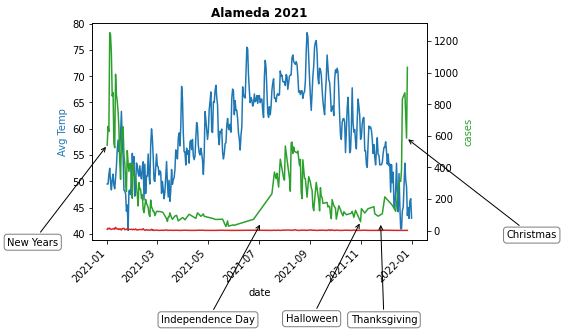

In [119]:
def double_line_avg_temp2021(county):
    
    # Creating plot with dataset_1
    fig, ax1 = plt.subplots()
    
    ax1.set_xlabel('date')
    ax1.set_ylabel('Avg Temp', color='tab:blue')
    ax1.plot(avgtemps2021[avgtemps2021['COUNTY']== county]['DATE'], 
             avgtemps2021[avgtemps2021['COUNTY']== county]['DATA_VALUE'], 
             color = 'tab:blue')
    plt.xticks(rotation=45, ha='right')
    
    ax1.tick_params(axis ='y')
    

 
    # Adding Twin Axes to plot using dataset_2
    ax2 = ax1.twinx()
    
 
    ax2.set_ylabel('cases', color='tab:green')
    #ax2.set_ylabel('deaths', color='tab:red')
    ax2.plot(cases2021[cases2021['County']== county]['Date'], 
             cases2021[cases2021['County']== county]['Cases'], 
             color = 'tab:green')
    ax2.plot(cases2021[cases2021['County']== county]['Date'], 
             cases2021[cases2021['County']== county]['Deaths'], 
             color = 'tab:red')
    ax2.tick_params(axis ='y')
    
    ## Standardizing the annotations for ease of modification
    arrows = dict(arrowstyle="->")
    box = dict(boxstyle="round", fc="white", ec="gray")
        
    ax2.annotate("New Years", 
                xy=(pd.to_datetime('2021-01-01'), get_cases(county, '2021-01-01')),  
                xycoords='data',
                bbox=box,
                xytext=(-100, -100), textcoords='offset points', 
                arrowprops=arrows)
    
    ax2.annotate("Independence Day", 
                xy=(pd.to_datetime('2021-07-04'), get_cases(county, '2021-07-04')),  
                xycoords='data',
                bbox=box,
                xytext=(-100, -100), textcoords='offset points', 
                arrowprops=arrows)
    
    ax2.annotate("Halloween", 
                 xy=(pd.to_datetime('2021-10-31'), get_cases(county, '2021-10-31')),  
                 xycoords='data',
                bbox=box,
                xytext=(-75, -100), textcoords='offset points', 
                arrowprops=arrows)
    
    ax2.annotate("Thanksgiving", 
                xy=(pd.to_datetime('2021-11-24'), get_cases(county, '2021-11-24')),  
                xycoords='data',
                bbox=box,
                xytext=(-30, -100), textcoords='offset points', 
                arrowprops=arrows)

    ax2.annotate("Christmas", 
                xy=(pd.to_datetime('2021-12-25'), get_cases(county, '2021-12-25')),  
                xycoords='data',
                bbox=box,
                xytext=(100, -100), textcoords='offset points', 
                arrowprops=arrows)
    
    # Adding title
    plt.title(county+' 2021', fontweight ="bold")



    #Saving the plot
    '''    graph_out_dir = 'Graph/2021/'
    if not os.path.exists(graph_out_dir):
        os.makedirs(graph_out_dir)
    fig.savefig(graph_out_dir+county+'_line.png', dpi = 300, bbox_inches='tight')'''
    
    # Show plot
    plt.show()
    
double_line_avg_temp2021('Alameda')

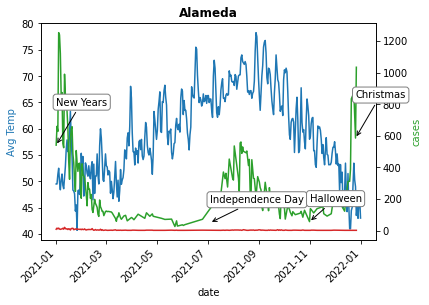

In [75]:
double_line_avg_temp2021('Alameda')

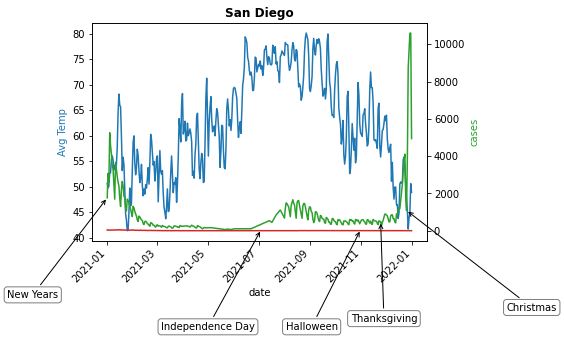

In [117]:
double_line_avg_temp2021('San Diego')

In [13]:
list_of_counties = cases['County'].unique()

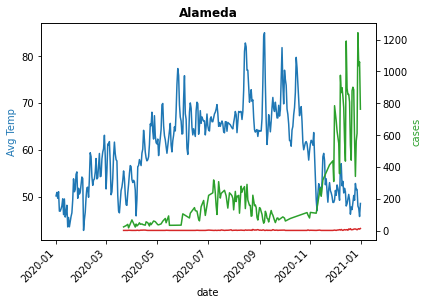

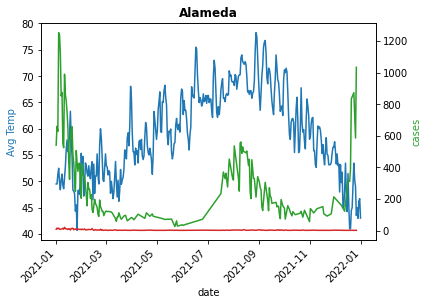

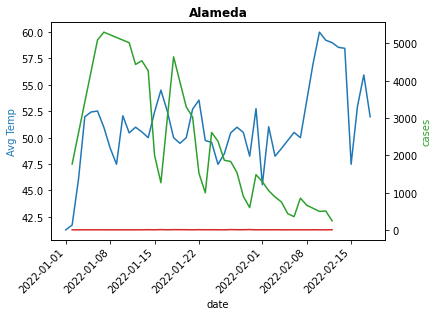

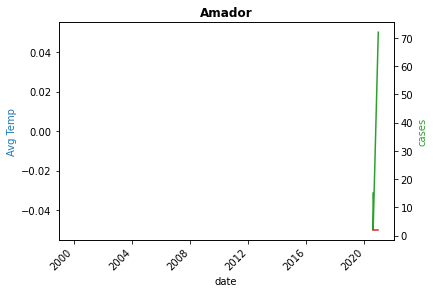

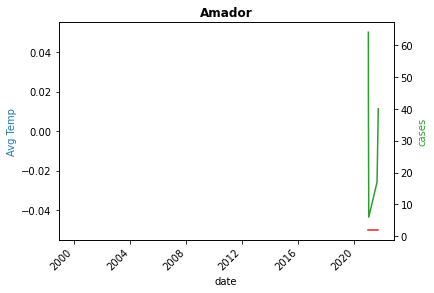

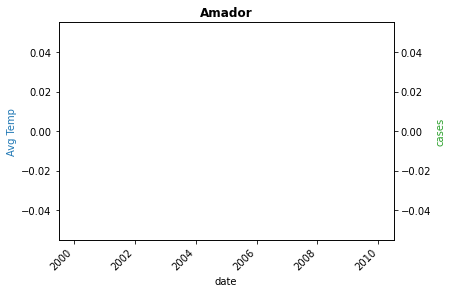

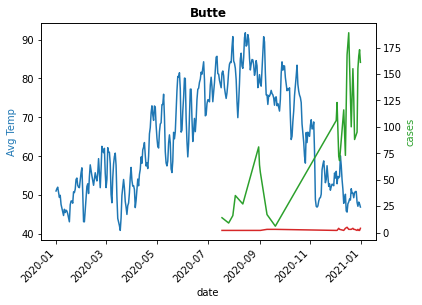

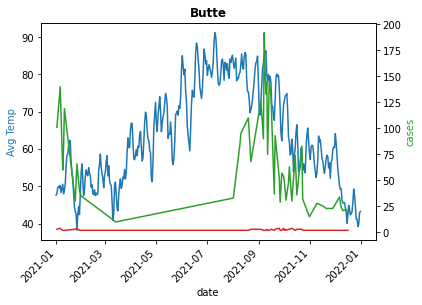

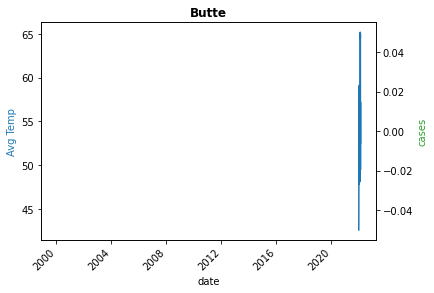

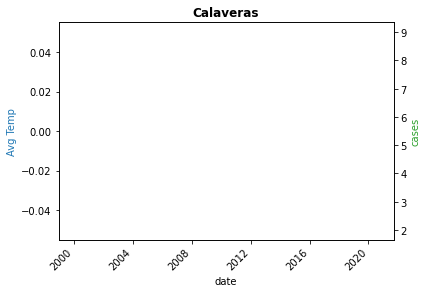

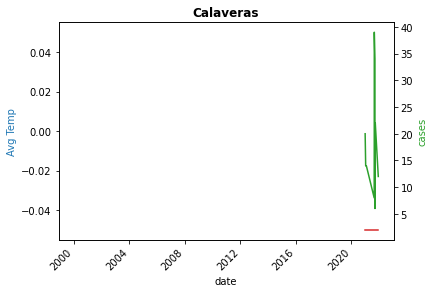

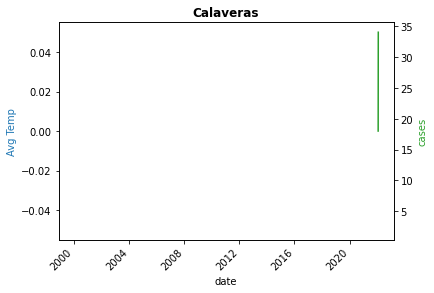

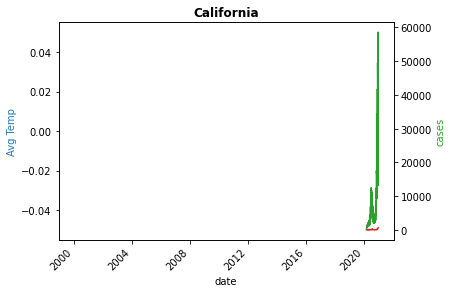

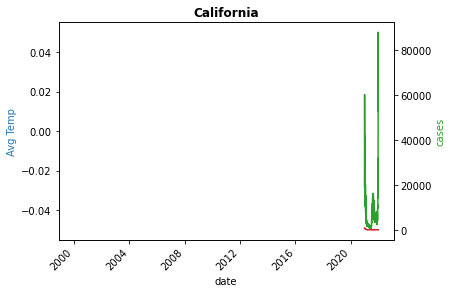

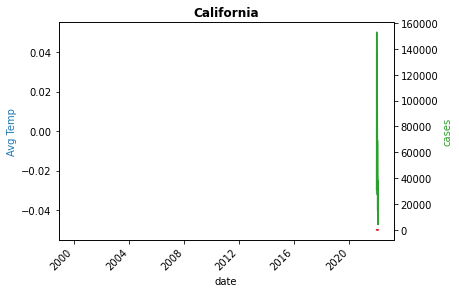

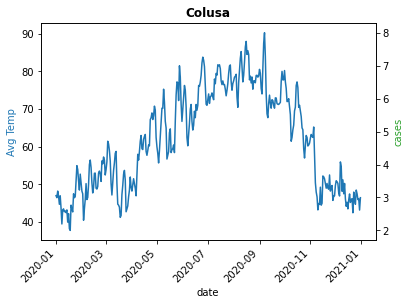

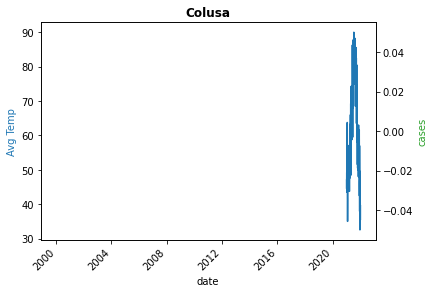

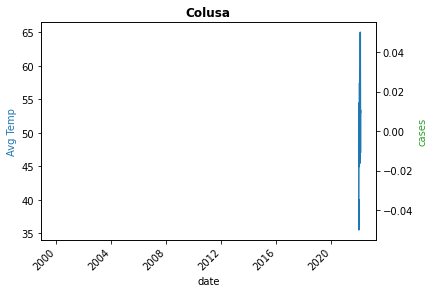

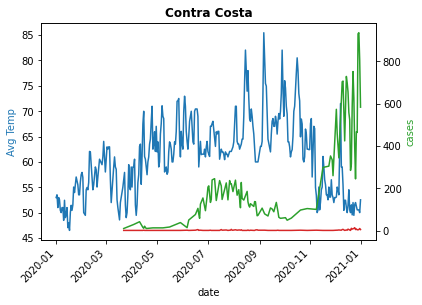

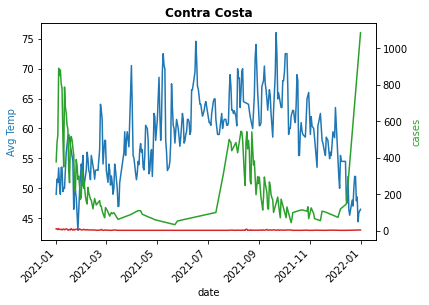

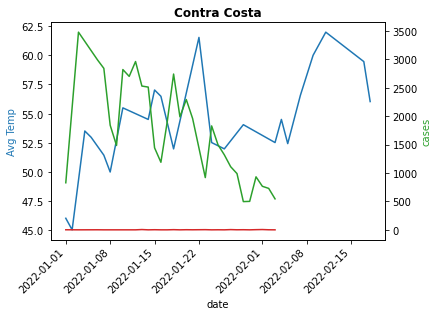

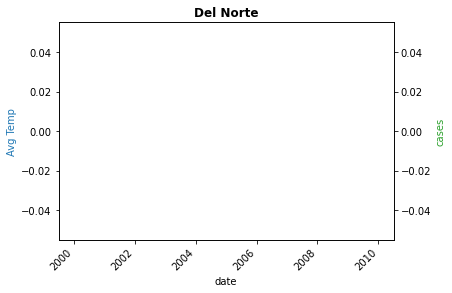

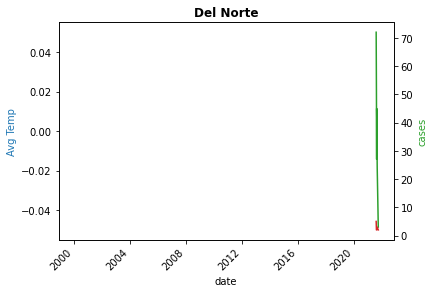

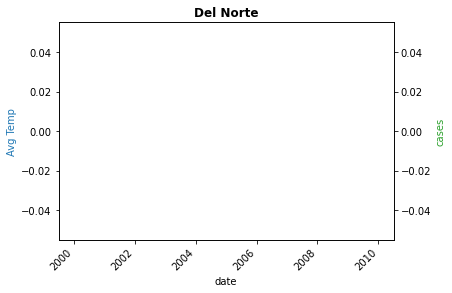

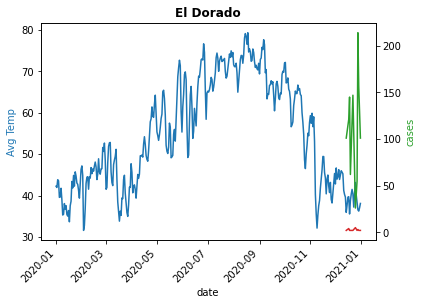

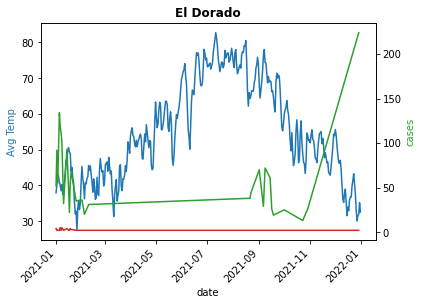

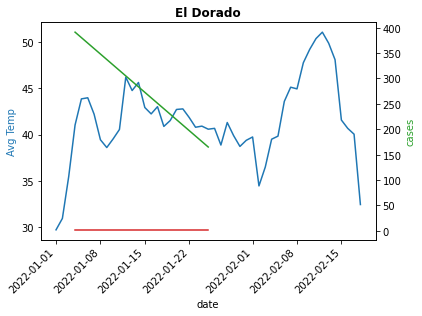

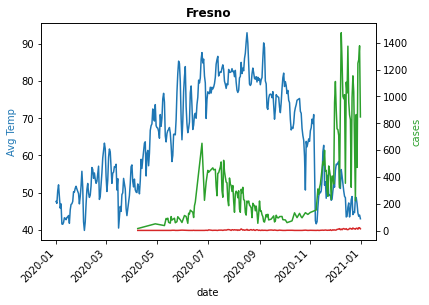

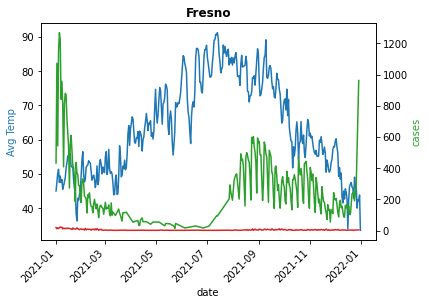

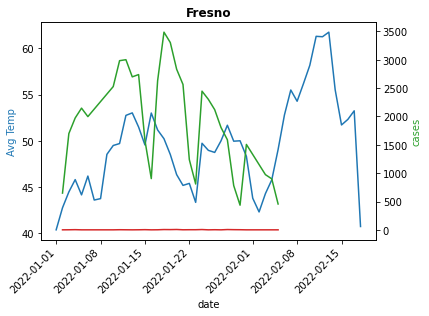

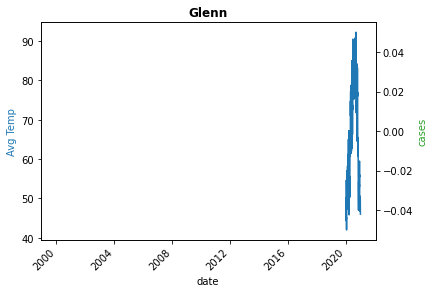

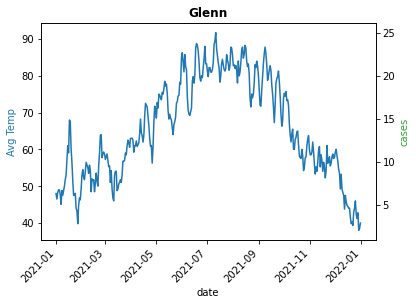

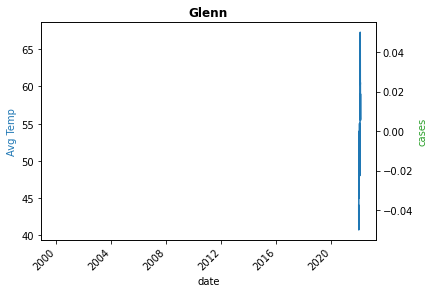

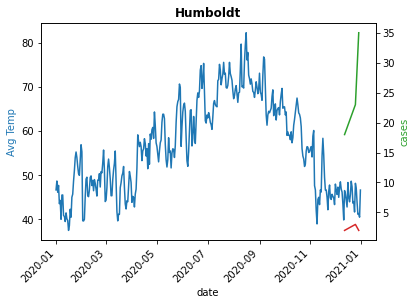

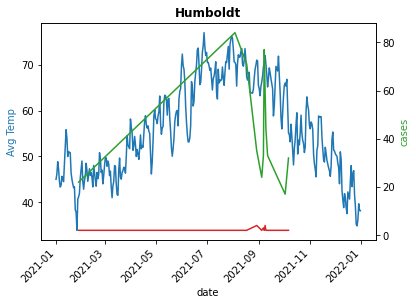

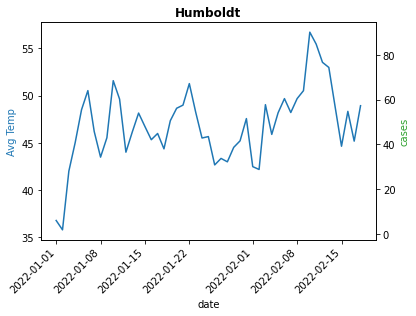

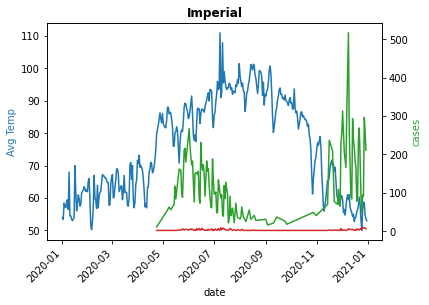

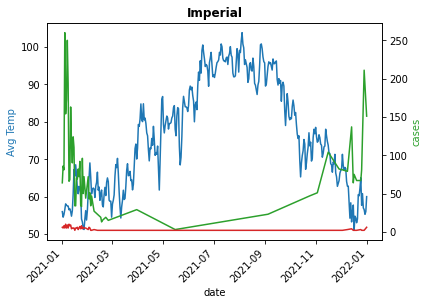

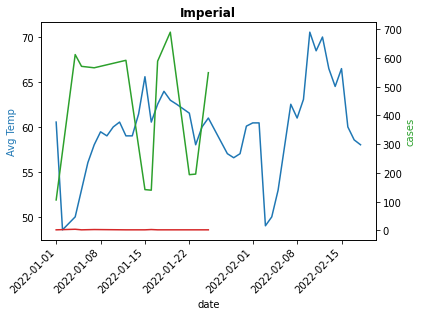

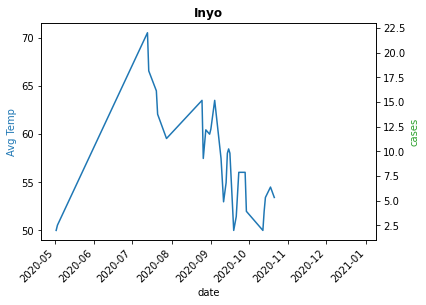

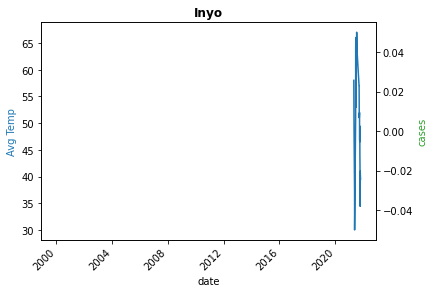

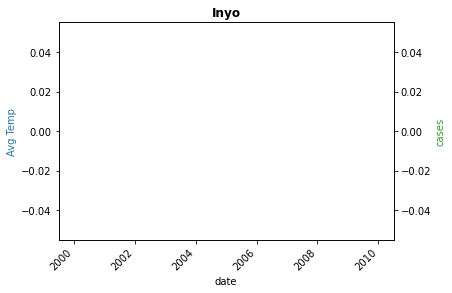

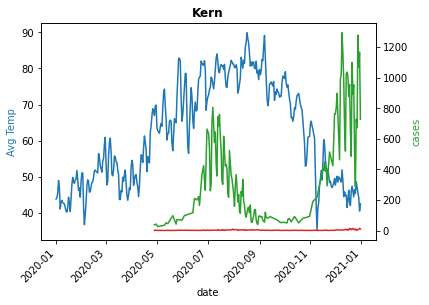

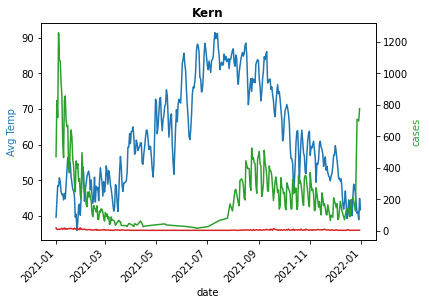

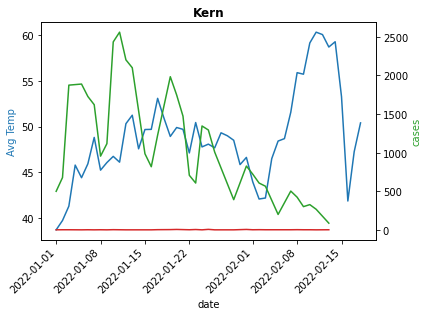

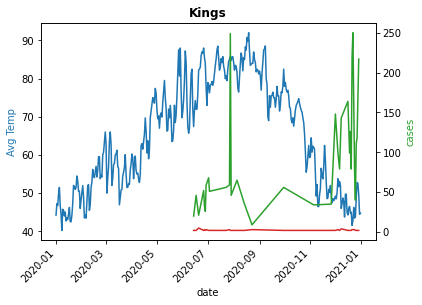

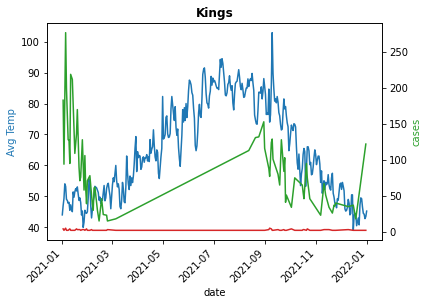

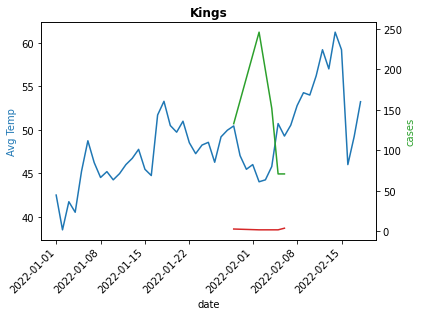

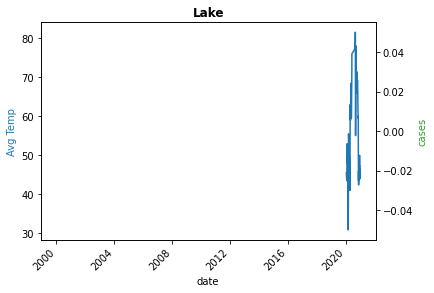

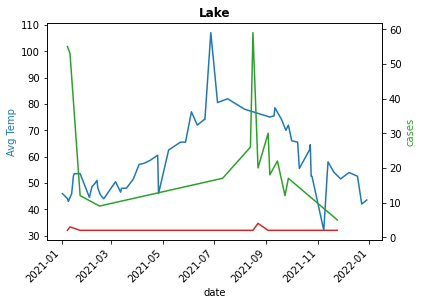

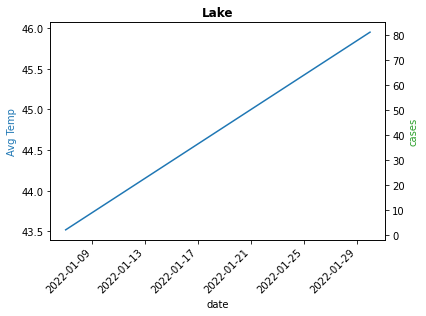

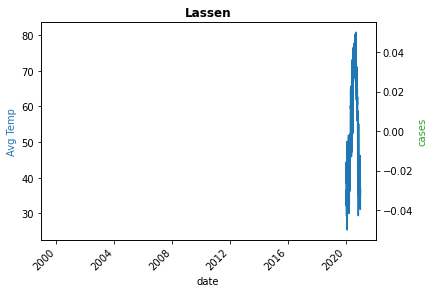

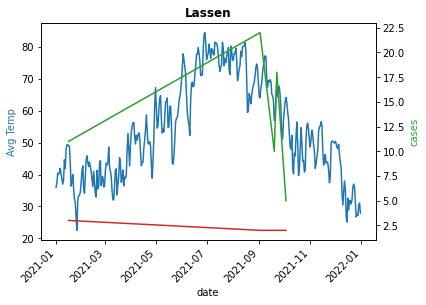

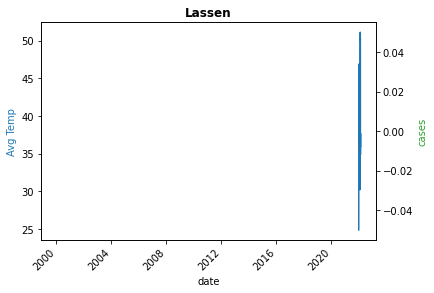

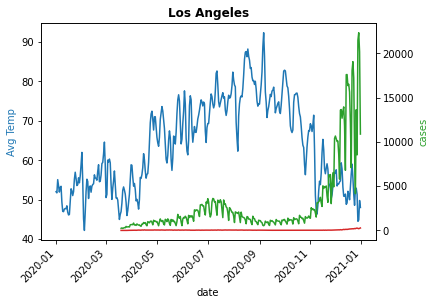

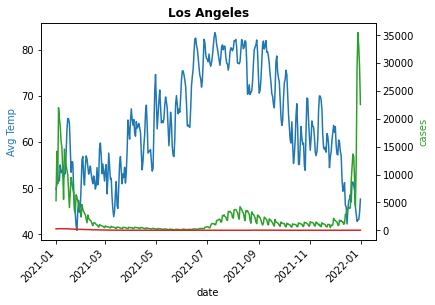

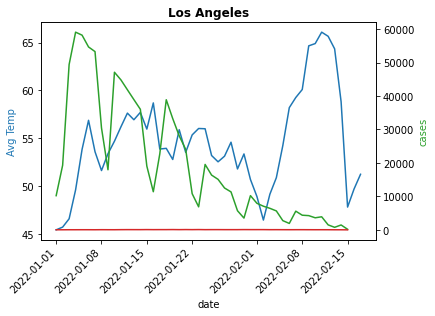

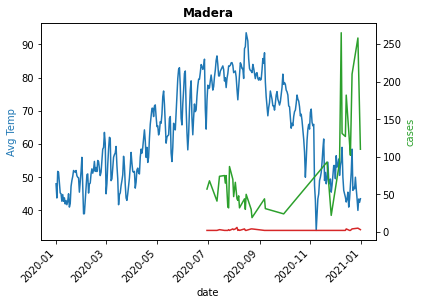

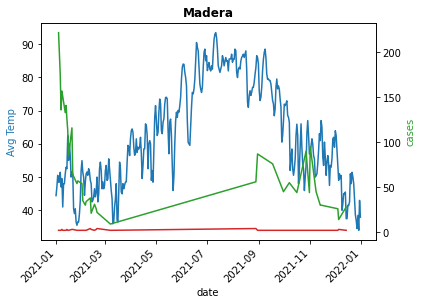

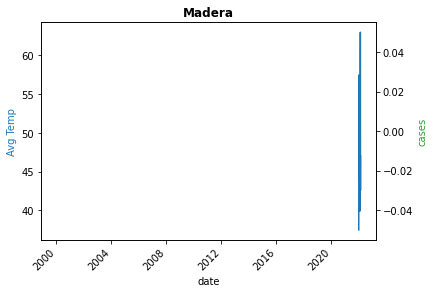

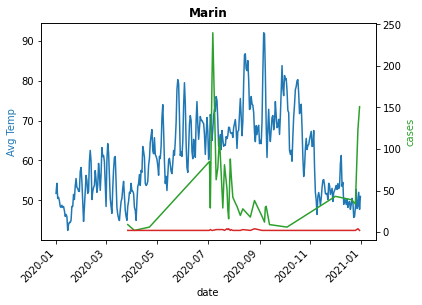

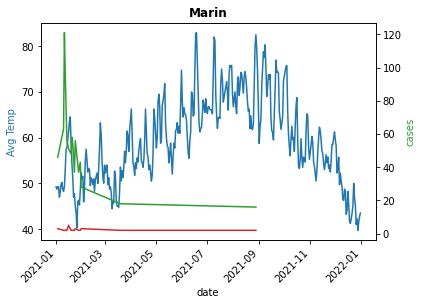

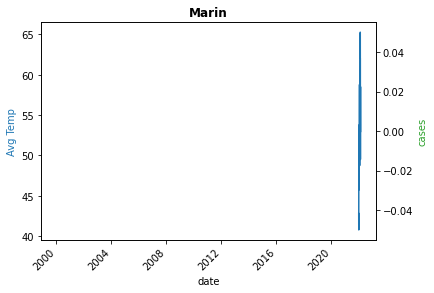

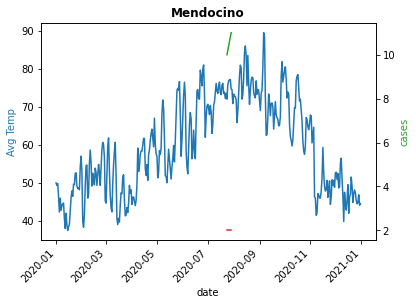

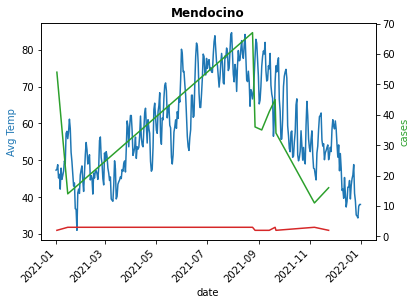

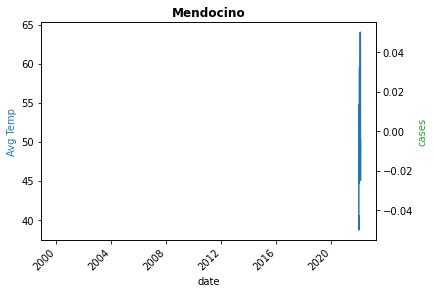

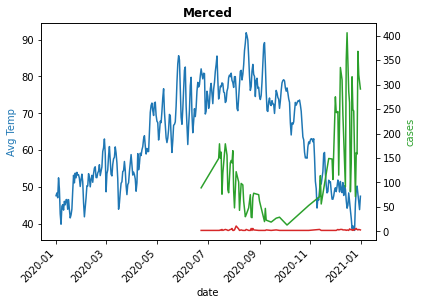

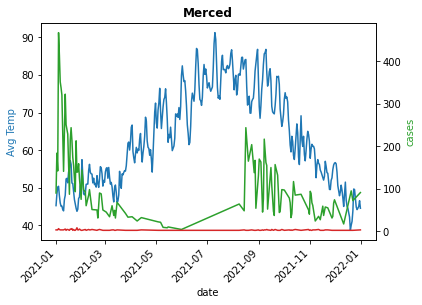

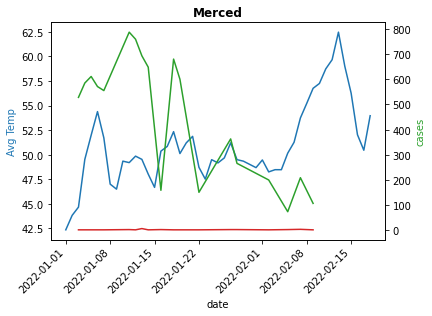

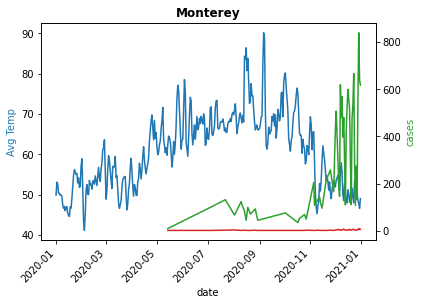

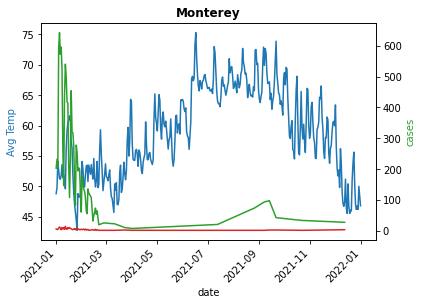

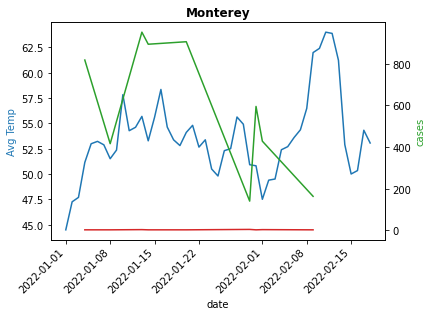

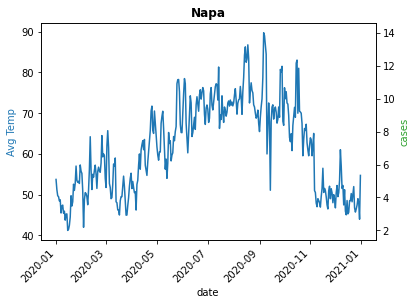

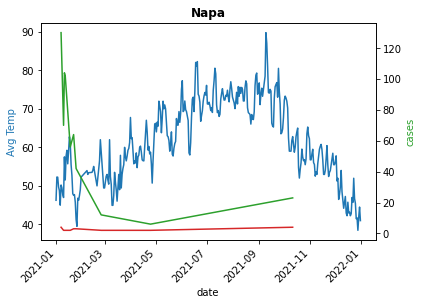

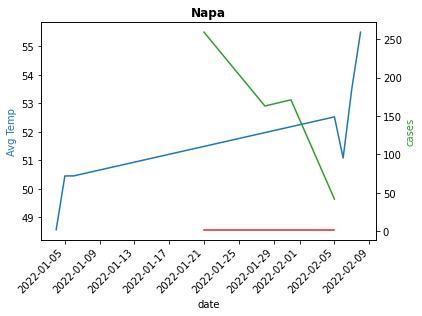

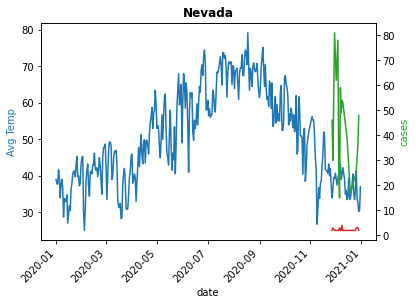

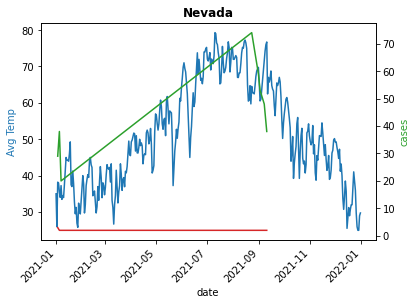

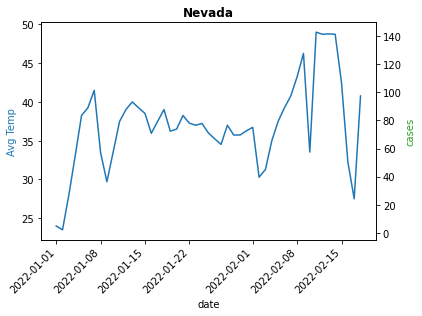

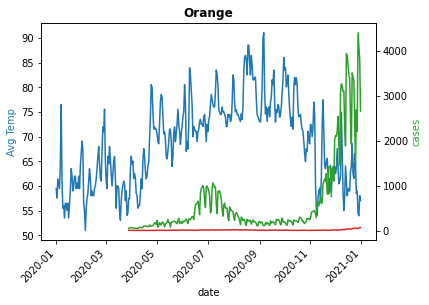

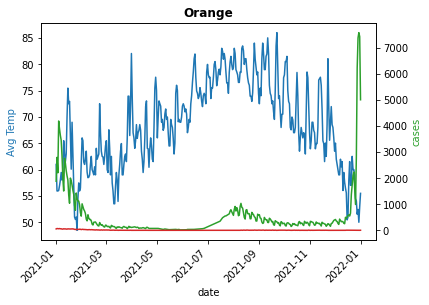

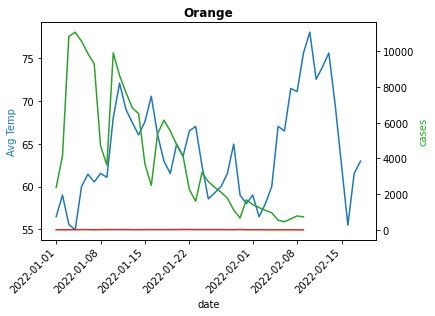

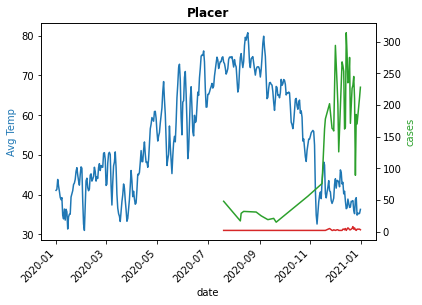

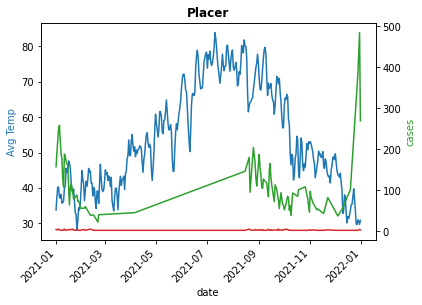

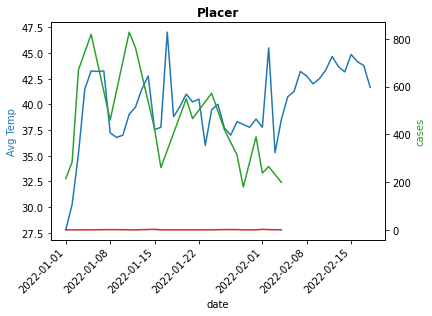

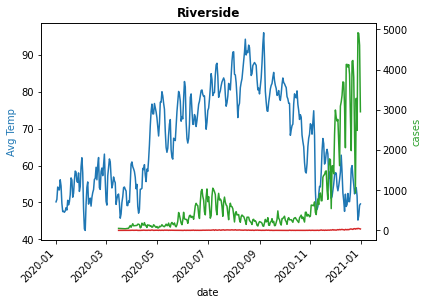

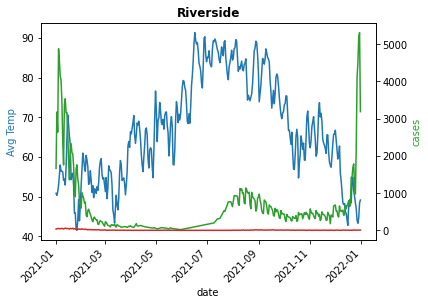

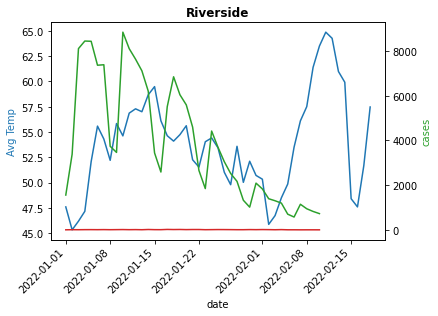

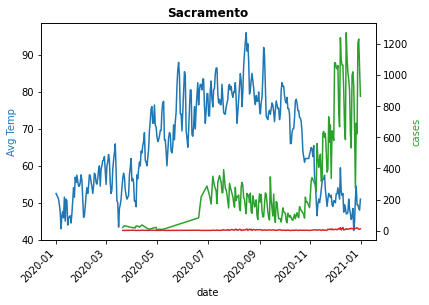

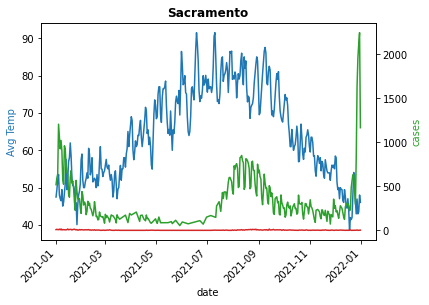

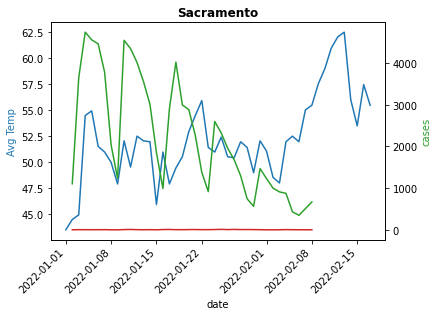

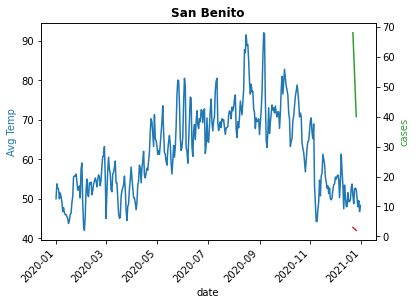

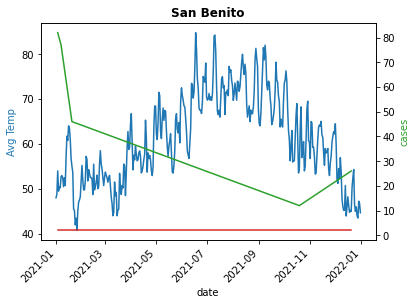

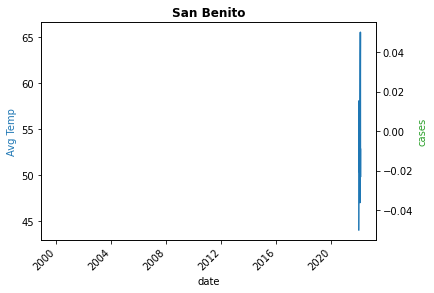

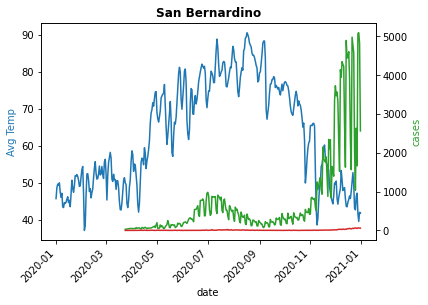

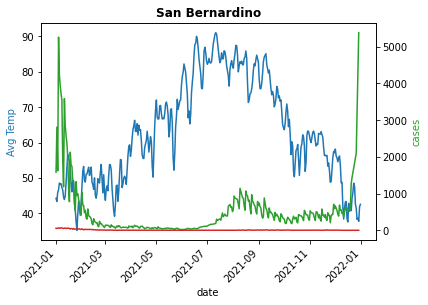

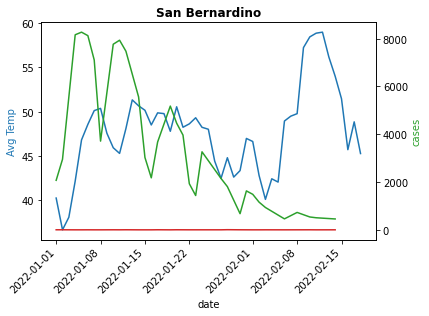

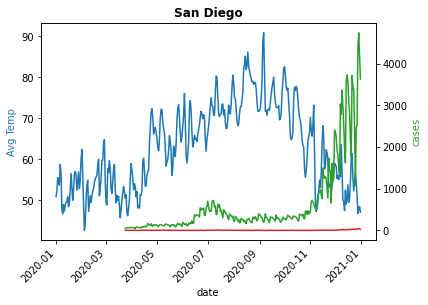

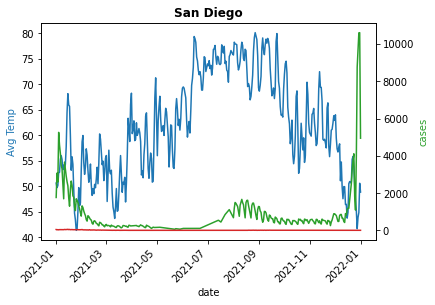

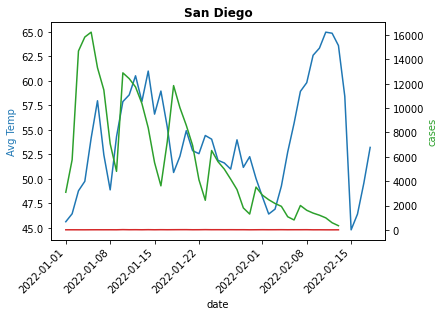

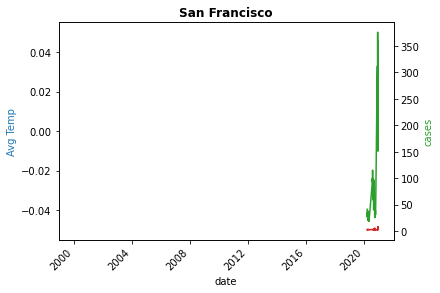

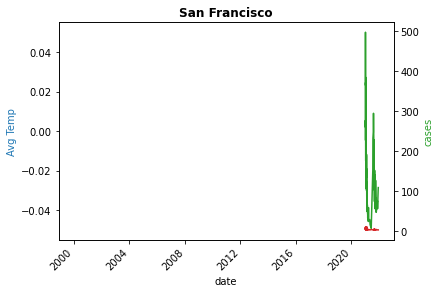

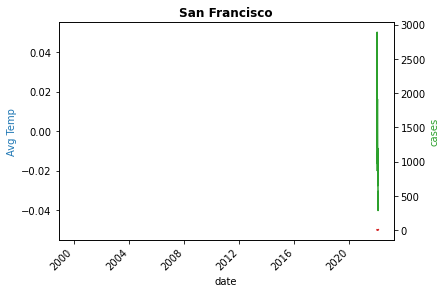

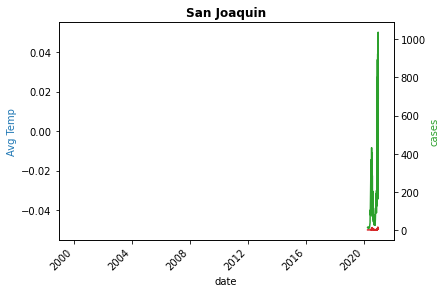

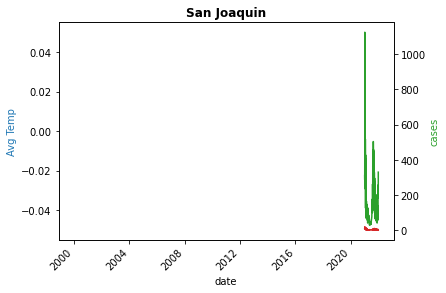

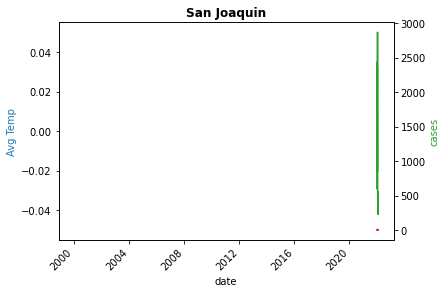

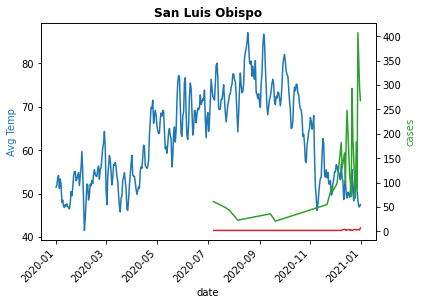

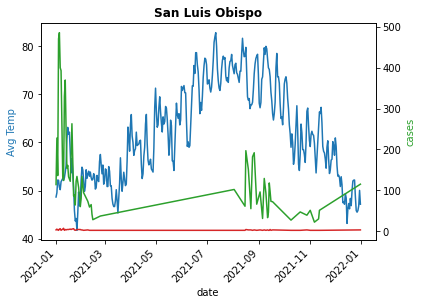

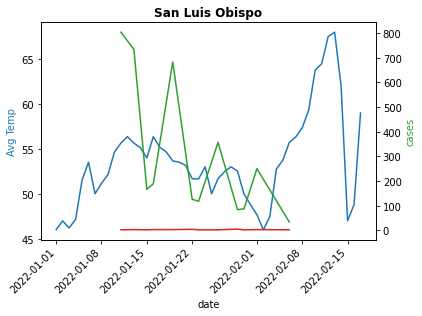

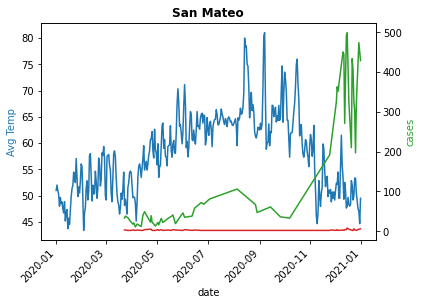

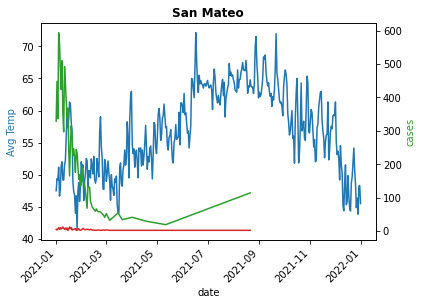

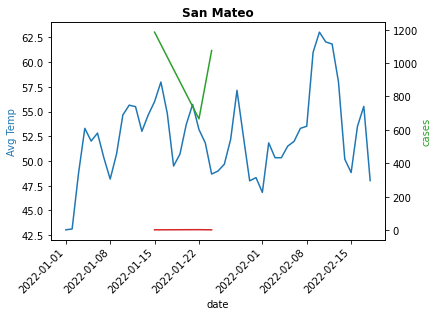

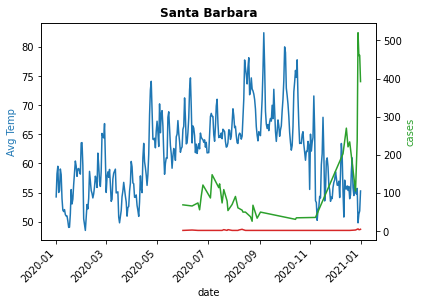

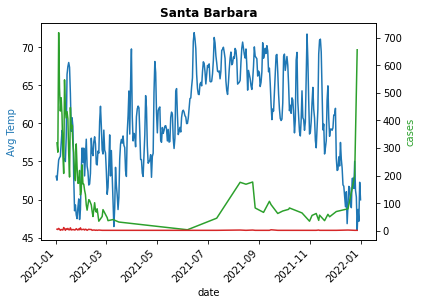

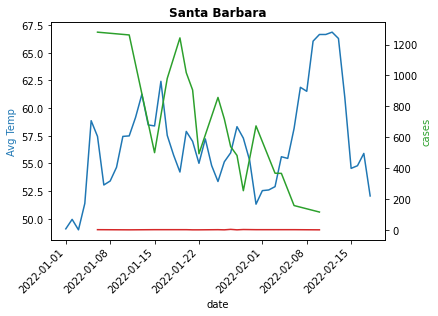

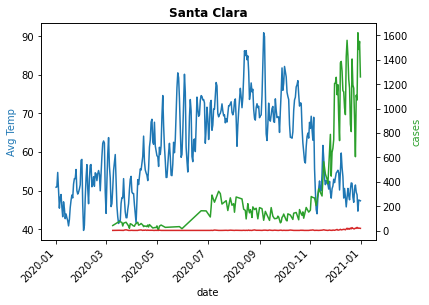

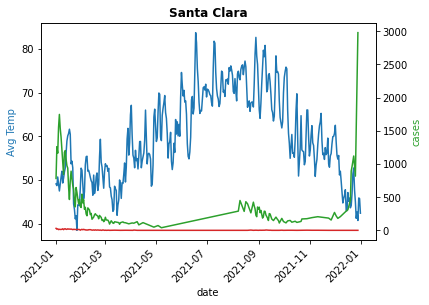

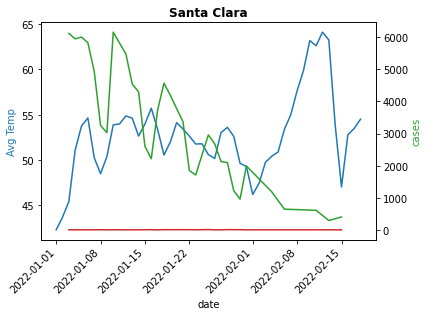

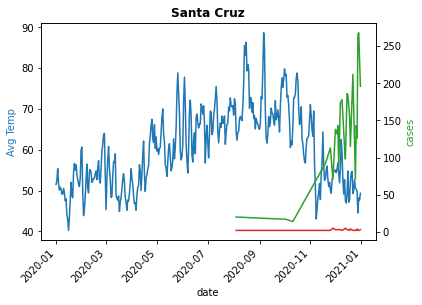

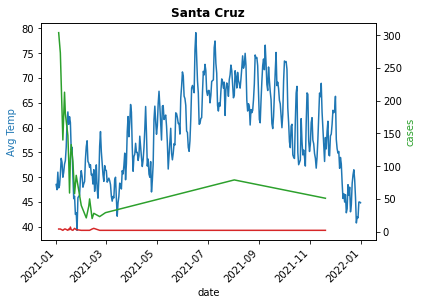

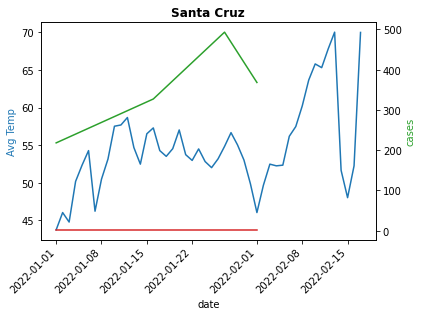

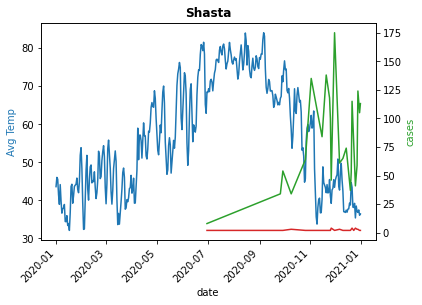

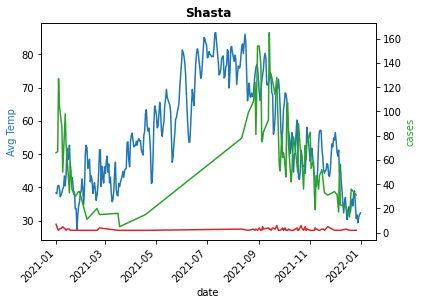

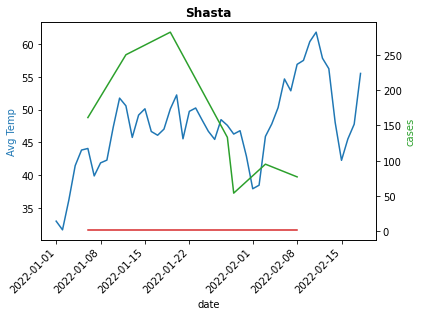

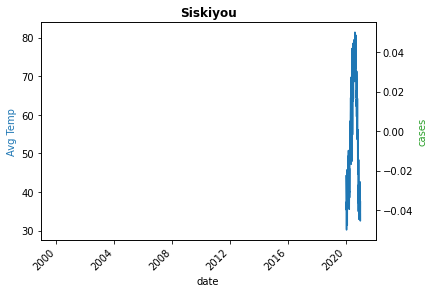

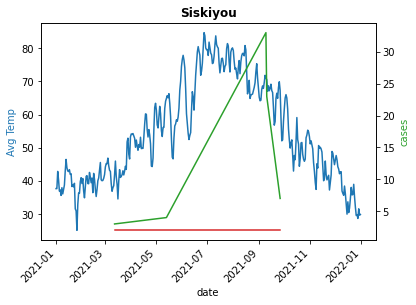

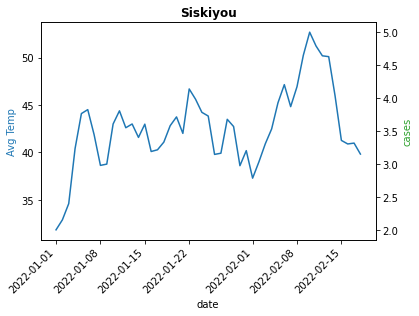

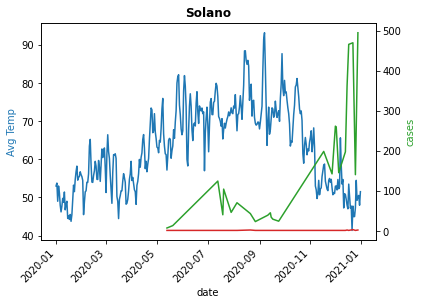

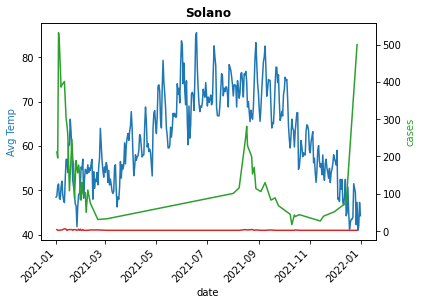

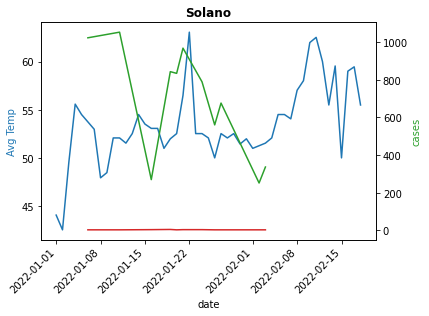

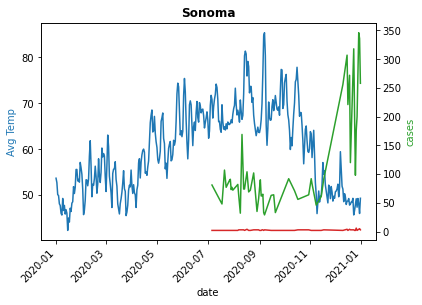

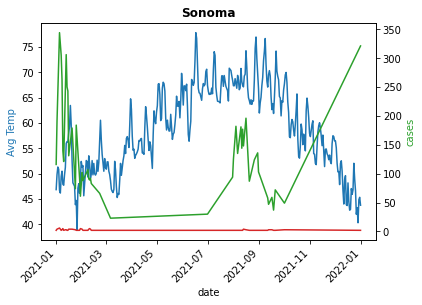

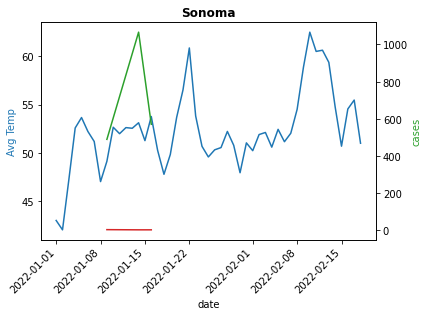

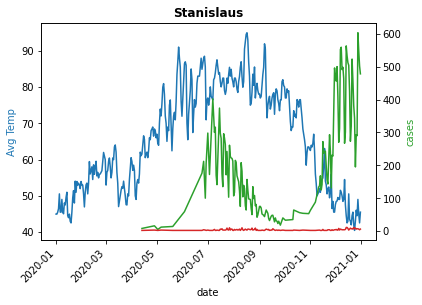

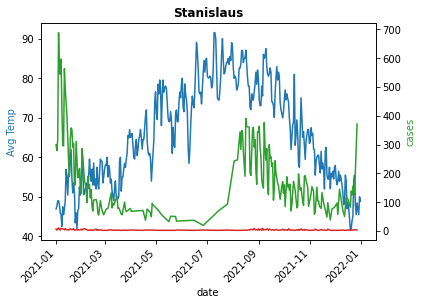

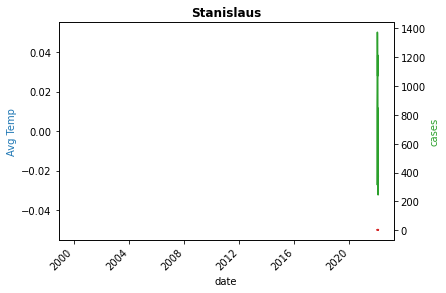

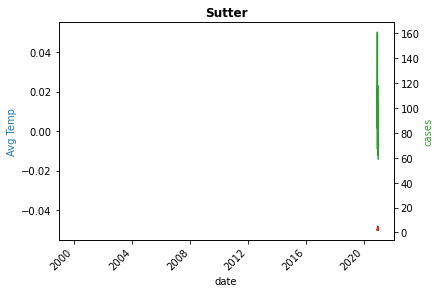

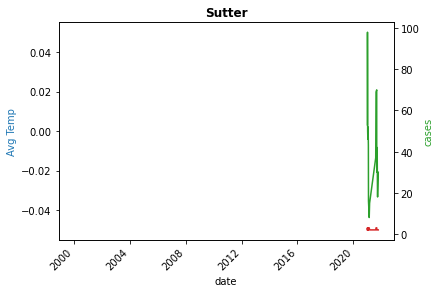

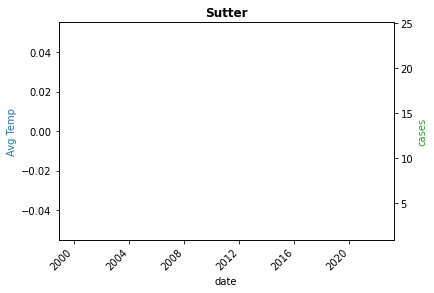

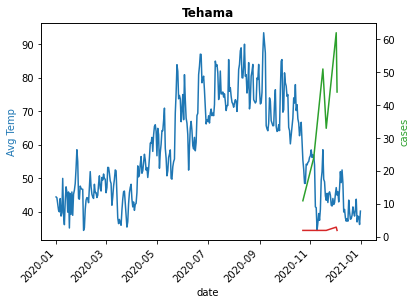

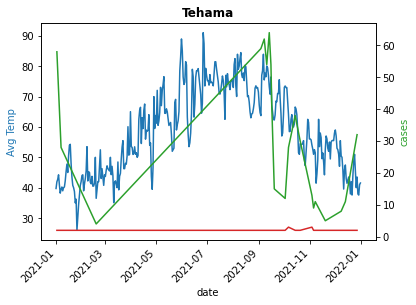

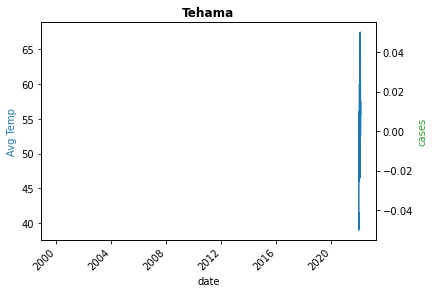

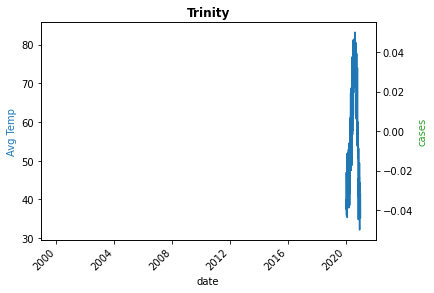

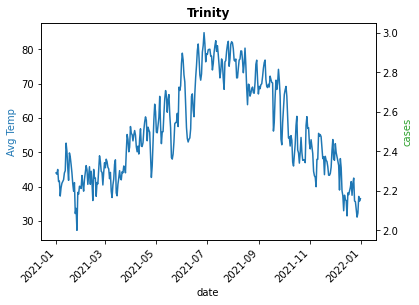

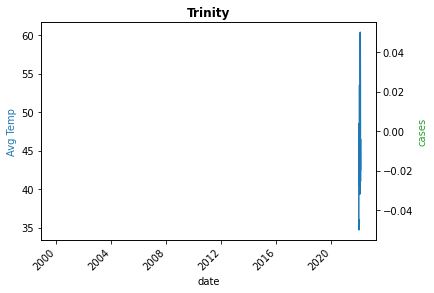

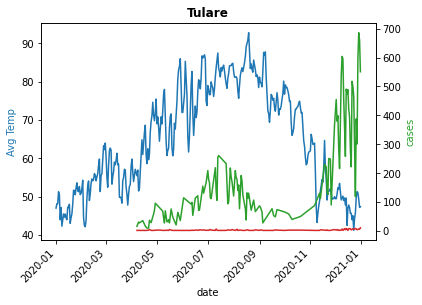

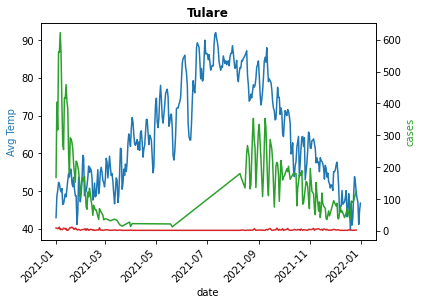

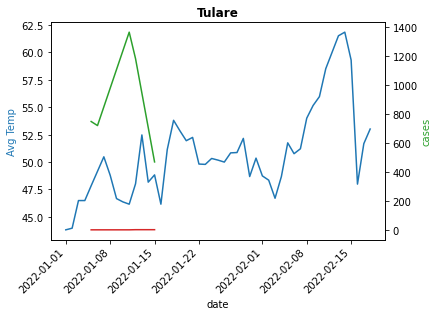

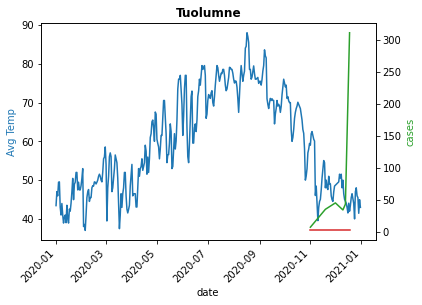

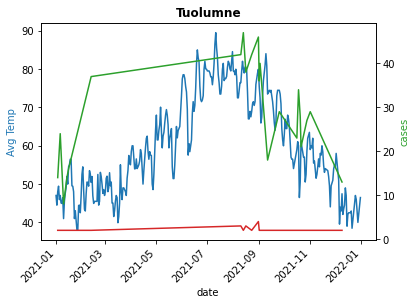

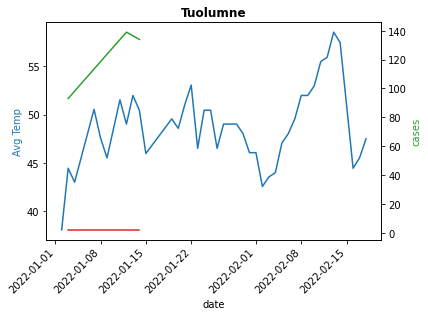

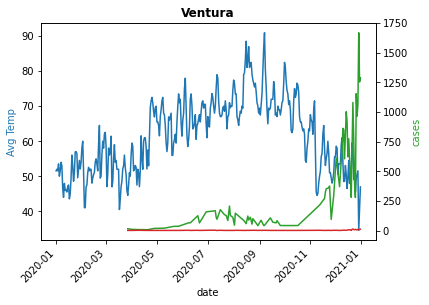

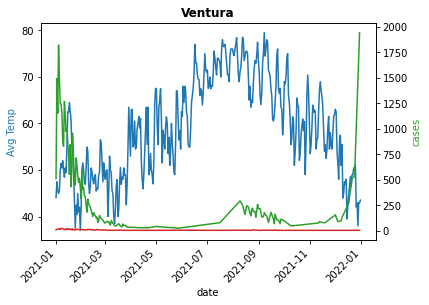

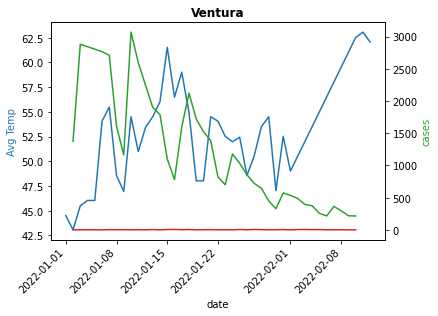

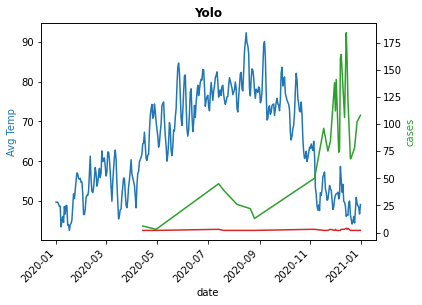

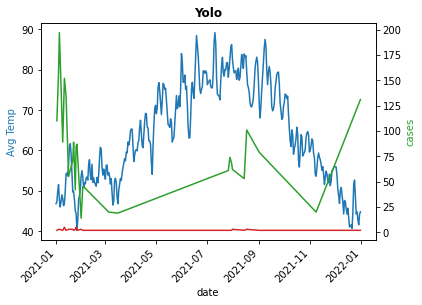

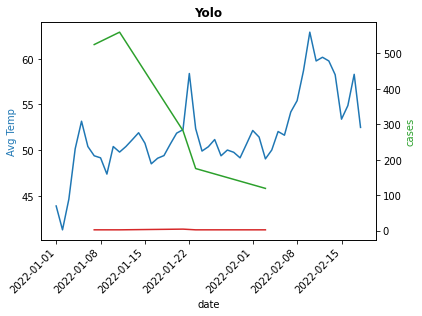

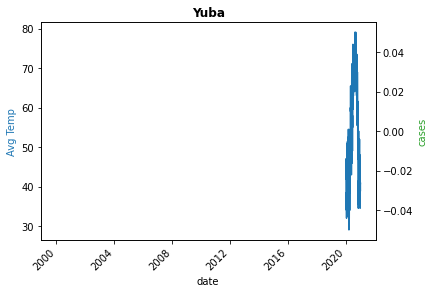

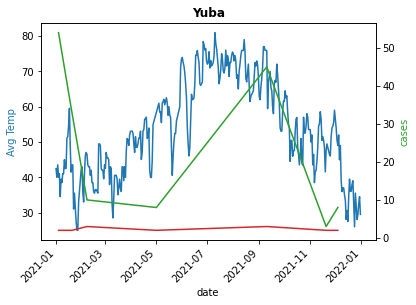

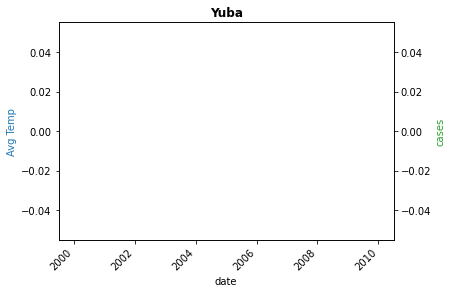

In [14]:
for county in list_of_counties:
    double_line_avg_temp2020(county)
    double_line_avg_temp2021(county)
    double_line_avg_temp2022(county)